# Programs for Expected Returns Project

In [1]:
# Import libraries

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math


In [3]:
# Import data and plot it

#For Damoran data 
df1 = pd.read_csv('Damoran_data.csv')
df1 = df1.iloc[:,0:10]
df1.head()
df1.tail()

# For Shiller data (monthly)
# df2=pd.read_csv("Shiller_data.csv", header=None, names = ['Date','S&P', 'Div', 'Earn', 'CPI', 'Date_Frac', 'LIR',                                                          'Real_price','Real_div','Real_earn', 'CAPE'] )


# # For Shiller data (annual)
# df1 = pd.read_csv('Shiller-Annual Data - Data.csv')
# df1.head()




,Year,S&P,3TBill,LIR,Stocks,TBills,TBonds,SmBills,SmBonds,RP
84,2012,0.1589,0.0005,0.0297,193388.43,1971.42,6926.40,0.1584,0.1292,0.0420
85,2013,0.3215,0.0007,-0.0910,255553.31,1972.72,6295.79,0.3208,0.4125,0.0462
86,2014,0.1352,0.0005,0.1075,290115.42,1973.77,6972.34,0.1347,0.0278,0.0460
87,2015,0.0136,0.0021,0.0128,294060.84,1977.91,7061.89,0.0115,0.0008,0.0454
88,2016,0.1174,0.0051,0.0069,328584.46,1988.00,7110.65,0.1123,0.1105,0.0462


In [56]:
# Index data

# For Damoran - Annual 
# df1['Year'] = pd.date_range(start='1928-01-01', end='2016-12-31', freq='A')
# df1 = df1.set_index('Year')
# df1.head()
# df1.tail()

# For Shiller - Monthly 
# df2['Date'] = pd.date_range(start='1871-01-31', end='2017-11-30', freq='M')
# df2 = df2.set_index('Date')
# df2.head()
# df2.tail()

# For Shiller - Annual

df1['Year'] = pd.date_range(start='1870', end='2027', freq='A')
df1 = df1.set_index('Year')

# For now drop 2017 onwards

df1_1 = df1[1:146]
df1_1.head()
df1_1.tail()



,Price,Div,Earn,Rate,RateLong,CPI,RealR,RealP,RealD,P_Ret,LogPR,Stocks,RealE,PE,E10,CAPE,Bond_Ret,LogBR,Bonds
Year,,,,,,,,,,,,,,,,,,,
2011-12-31,1300.58,31.25,86.51,0.17,1.97,226.67,0.99,1321.32,31.25,0.14,0.13,78719.45,86.51,14.96,70.35,20.27,0.01,0.01,47758.76
2012-12-31,1480.40,34.99,100.20,0.13,1.91,230.28,0.99,1480.40,34.45,0.24,0.21,95342.82,98.64,17.11,74.16,21.04,-0.07,-0.07,44538.74
2013-12-31,1822.36,39.44,102.31,0.12,2.86,233.92,1.00,1794.03,38.86,0.14,0.13,107466.59,100.81,18.19,77.17,24.19,0.07,0.07,47543.84
2014-12-31,2028.18,43.39,89.82,0.20,1.88,233.71,0.99,1998.44,42.22,-0.04,-0.05,102555.27,87.40,19.82,77.79,25.90,-0.01,-0.01,46936.17
2015-12-31,1918.60,38.95,96.15,0.54,2.09,236.65,0.99,1866.94,37.43,0.19,0.17,120501.38,92.41,21.36,77.76,24.00,-0.02,-0.02,46064.50


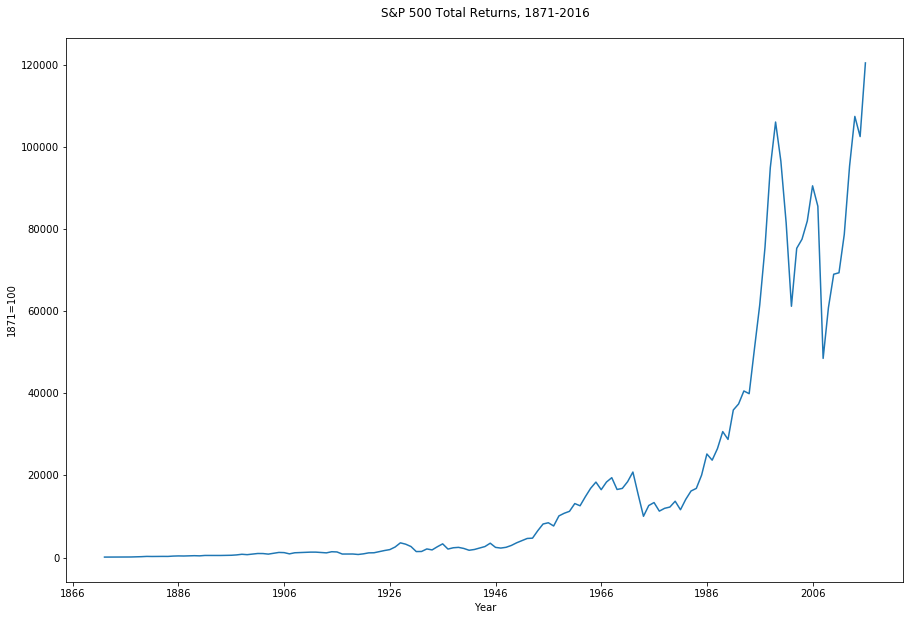

In [58]:
# Plot S&P Performance

plt.figure(figsize=(15,10))
plt.plot(df1_1['Stocks'])
plt.xlabel('Year')
plt.ylabel('1871=100')
plt.title('S&P 500 Total Returns, 1871-2016\n')


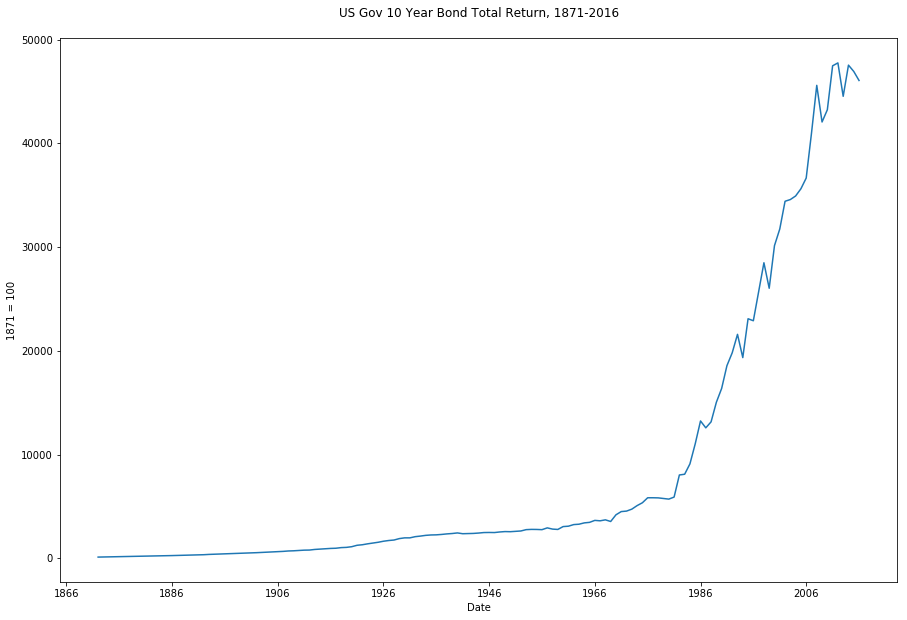

In [59]:
# Plot 10 Year US Government Bond Price

#df1['LIR'] = df1['LIR'].apply(pd.to_numeric, errors='coerce')
#df1['LIR'] = df1['LIR'].dropna()

plt.figure(figsize=(15,10))
plt.plot(df1_1['Bonds'])
plt.xlabel('Date')
plt.ylabel('1871 = 100')
plt.title('US Gov 10 Year Bond Total Return, 1871-2016\n')


In [60]:
# Some functions to calculate rolling returns

def rollingreturn_price (price, window=1):
    """
    This function calculates a rolling return
    input - window length
            price
            
    output - rolling return
    """
    ret = price.sum(periods=window,axis=0)
    return ret

def rollingreturn_ret (ret, window=1):
    """
    Calculates annualized returns from log
    Input - annual returns
    Output - annualized returns
    """
    logret = np.log(1+ret)
    
    return logret.rolling(window).sum()*1/window


In [64]:
# Calculate Returns

df1['e10'] = rollingreturn_ret(df1['S&P'], 10)
df1['i10'] = rollingreturn_ret(df1['LIR'], 10)


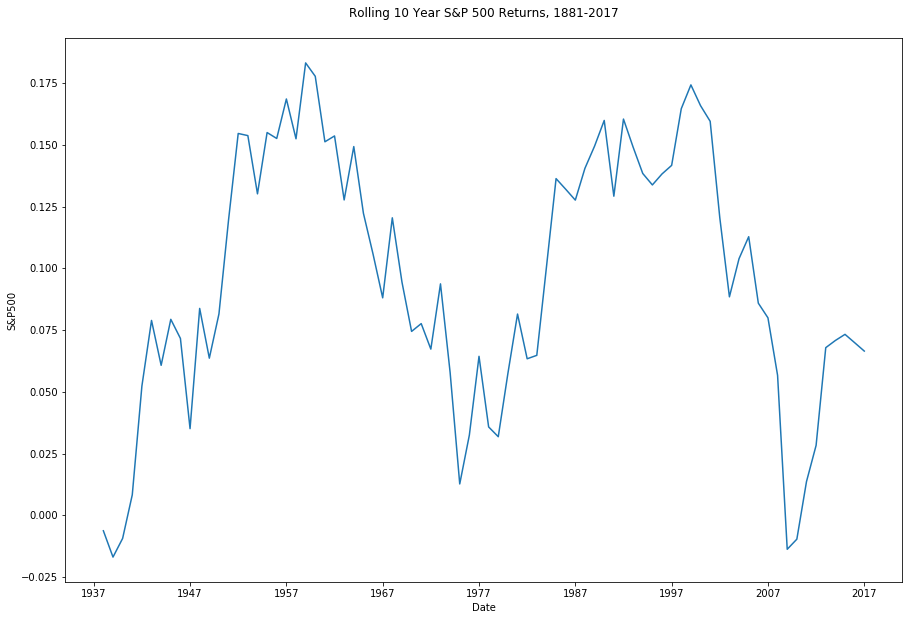

In [65]:
# Rolling Return for Equities

plt.figure(figsize=(15,10))
plt.plot(df1['e10'])
plt.xlabel('Date')
plt.ylabel('S&P500')
plt.title('Rolling 10 Year S&P 500 Total Returns, 1881-2017\n')


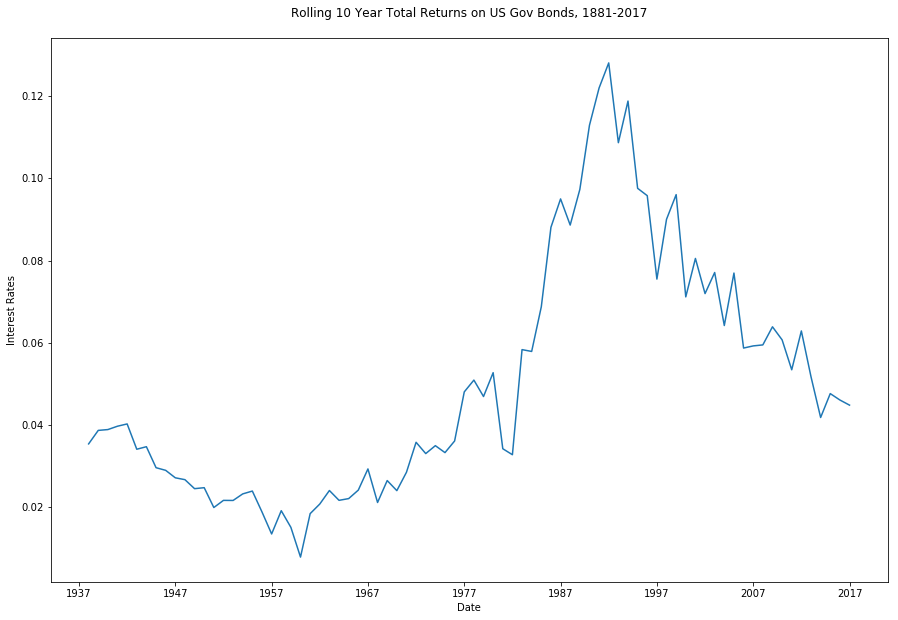

In [66]:
# Rolling Return for Bonds

plt.figure(figsize=(15,10))
plt.plot(df1['i10'])
plt.xlabel('Date')
plt.ylabel('Interest Rates')
plt.title('Rolling 10 Year Total Returns on US Gov Bonds, 1881-2017\n')

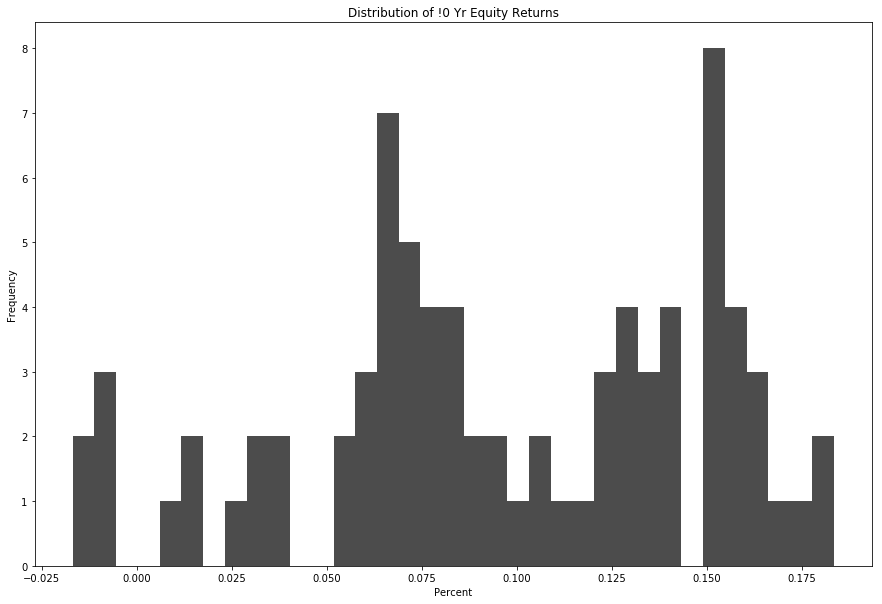

In [67]:
# Histogram of equity returns

plt.figure(figsize=(15,10))
df1['e10'].plot.hist(bins=35,alpha=0.7, color='k')
plt.xlabel('Percent')
plt.title('Distribution of !0 Yr Equity Returns')

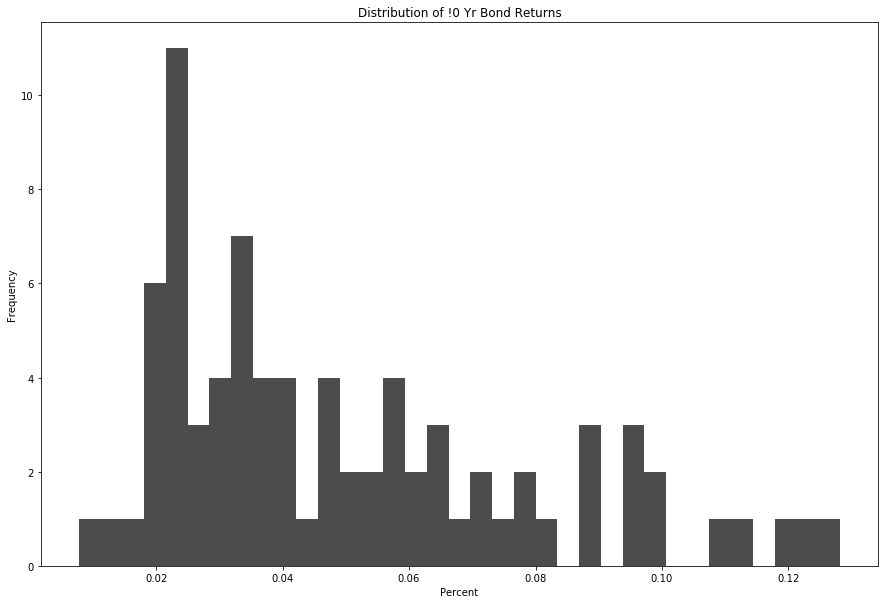

In [68]:
# Histogram of bond returns

plt.figure(figsize=(15,10))
df1['i10'].plot.hist(bins=35,alpha=0.7, color='k')
plt.xlabel('Percent')
plt.title('Distribution of !0 Yr Bond Returns')

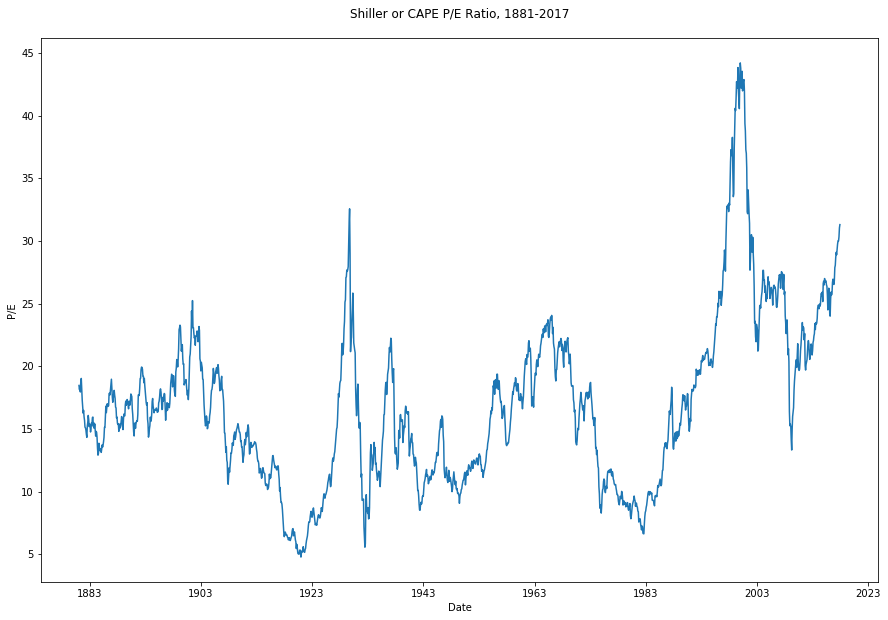

In [73]:
# Plot CAPE


plt.figure(figsize=(15,10))
plt.plot(df2['CAPE'])
plt.xlabel('Date')
plt.ylabel('P/E')
plt.title('Shiller or CAPE P/E Ratio, 1881-2017\n')

In [74]:
# Save the data in a pickle file

df1.to_pickle('W209_Data_File_Yr.pickle')
df2.to_pickle('W209_Data_File_Mn.pickle')